In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

import os

In [ ]:
import tensorflow.keras as keras # import the keras module from tensorflow

# load_data returns a tuple of two tuples, so unpack it accordingly
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train = x_train.reshape(-1) # Reshape x_train to a 1D array using the reshape method. -1 infers the size of the new dimension.
print(x_train[:10]) # Print the first 5 elements of the reshaped array using slicing.

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

In [ ]:
def img_show(x,y,i):
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.imshow(x[i],cmap='gray')
  plt.xlabel(classes[y[i]])

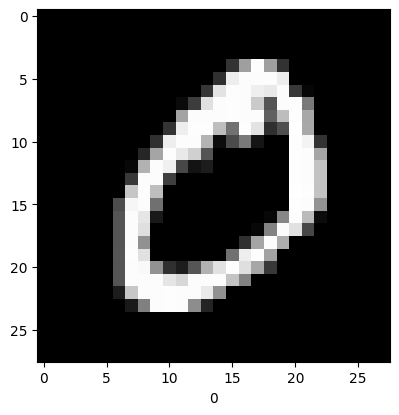

In [ ]:
# Reshape x_train to its original shape. You'll need to know
# the original dimensions of the images.
# Assuming the images are 28x28 grayscale:
x_train = x_train.reshape(-1, 28, 28)

# Now you can display the image
img_show(x_train,y_train,1)

In [ ]:
x_train_norm=x_train/255.0
x_test_norm=x_test/255.0

In [ ]:
#cnn creation
from keras import models,layers # import the necessary modules

cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')]
)

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train_norm,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.4606 - loss: 1.5035
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9045 - loss: 0.3159
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9322 - loss: 0.2195
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9536 - loss: 0.1557
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9605 - loss: 0.1298
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9660 - loss: 0.1080
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9713 - loss: 0.0969
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9725 - loss: 0.0889
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.9750 - loss: 0.0845
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.9755 - loss: 0.0775


In [ ]:
cnn.evaluate(x_test_norm,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9709 - loss: 0.0909


[0.07527432590723038, 0.9764999747276306]